
# 1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
        1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10                  handles and find the top 5 which have the highest number of followers.
       

In [1]:
from selenium import webdriver as wb
from bs4 import BeautifulSoup as bs
import requests
import time

path='C:/Users/RAHUL/Documents/Web_Scrapping/Insta-Bot-2/chromedriver'
driver=wb.Chrome(executable_path=path)
driver
driver.maximize_window()

In [ ]:
def user_login(u_name,password):
    url='https://www.instagram.com/'
    driver.get(url)
    driver.implicitly_wait(3)
    username=driver.find_element_by_name(name='username')
    username.send_keys(u_name)
    pswd=driver.find_element_by_name(name='password')
    pswd.send_keys(password)
    try:
        a=driver.find_element_by_class_name('sqdOP  ')
        a.submit()
        Not_now=driver.find_element_by_class_name('cmbtv')
        Not_now.click()
        time.sleep(2)
        off_notification=driver.find_element_by_class_name('aOOlW.HoLwm')
        off_notification.click()
    except:
        print("Please check your entered username or password one of them is incorrect")
    
u_name=input()
password=input()
user_login(u_name,password)

In [3]:

#function to enter search keywords in search field
def search(value):
    srch=driver.find_element_by_class_name('XTCLo ')
    srch.send_keys(value)

value='food'
search(value) # search for Food

time.sleep(3)
try:
    li=driver.find_elements_by_css_selector("a.yCE8d  ")
    url=[]
    for i in li[:10]:
        url.append(i.get_attribute('href'))

    # create a dictionary d which will store the top 10 handle names from search as keys and there "followers count" and "url"
    # as tuple values
    d={}
    url_list=[]
    for i in url:
        if 'explore' not in i:
            driver.get(i)
            time.sleep(3)
            profile_name= driver.find_element_by_css_selector('div.nZSzR h2').get_attribute('innerHTML')
            followers_count=driver.find_element_by_css_selector('a.-nal3 span').get_attribute('title')
            if profile_name not in d:
                d[profile_name]= (int(followers_count.replace(',','').strip()),i)
                
    #printing the dictionary
    print(d)
     
except:
    print("Something went wrong")

{'foodnetwork': (10433682, 'https://www.instagram.com/foodnetwork/'), 'yourfoodlab': (1337178, 'https://www.instagram.com/yourfoodlab/'), 'delhi_streets_food': (29175, 'https://www.instagram.com/delhi_streets_food/'), '_.food_nation._': (2122, 'https://www.instagram.com/_.food_nation._/'), 'foody_india_only_': (66, 'https://www.instagram.com/foody_india_only_/'), 'food': (63897, 'https://www.instagram.com/food/'), 'bhagwaankepakwaan': (809, 'https://www.instagram.com/bhagwaankepakwaan/'), 'ynmfoodie': (15, 'https://www.instagram.com/ynmfoodie/'), 'khaaaaaate_rahooo': (46, 'https://www.instagram.com/khaaaaaate_rahooo/'), 'petfoodsinfo': (1139, 'https://www.instagram.com/petfoodsinfo/')}


In [4]:
#sorting the dictionary d keys (user profiles) in descending order on the basis of their followers count

sorted_dict=sorted(((value,key) for (key,value) in d.items()), reverse=True)

#saving top 5 user profiles with most followers in the sorted_dict along with the followers count and their insta handles
for i in sorted_dict[:5]:
    print(i[-1],":",i[-2][0],"and url:",i[-2][1])

foodnetwork : 10433682 and url: https://www.instagram.com/foodnetwork/
yourfoodlab : 1337178 and url: https://www.instagram.com/yourfoodlab/
food : 63897 and url: https://www.instagram.com/food/
delhi_streets_food : 29175 and url: https://www.instagram.com/delhi_streets_food/
_.food_nation._ : 2122 and url: https://www.instagram.com/_.food_nation._/


2. Now Find the number of posts these handles have done in the previous 3 days.

In [5]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import arrow
import datetime


#let's initialize a list to store the total count of the posts made by each user in previous 3 days 
post_count=[]
for i in sorted_dict[:5]:
    driver.get(i[-2][1])
    
    # clciking on the first post
    post= driver.find_element_by_class_name('_9AhH0')
    post.click()
    
    date_time= driver.find_element_by_css_selector('a.c-Yi7 time' )
    post_date= date_time.get_attribute('datetime')[:10]
    pd=arrow.get(post_date)
    cd=arrow.get(datetime.date.today())
    diff=cd-pd
    
    count=0
    
    # if post is 3 days old then add 0 to the list post count
    if diff.days>3:
        post_count.append(count)
        print("Number of posts made in previous 3 days by",i[-1],":",count)
        
    #else counting the no of posts which are posted in previous 3 days   
    else:
        count+=1
        while True:

            time.sleep(1.2)
            
            # going to next post by clicking on > icon in the popup frame
            next_img= driver.find_element_by_xpath("//a[contains(@class,'_65Bje  ')]")
            next_img.click()

            date_time= driver.find_element_by_css_selector('a.c-Yi7 time' )
            post_date= date_time.get_attribute('datetime')[:10]
            pd=arrow.get(post_date)
            cd=arrow.get(datetime.date.today())
            diff=cd-pd
            
            # breaking out of the loop if posted date is 3 days before from today
            if diff.days>=3:
                break
            else:
                count+=1
        post_count.append(count)
        print("Number of posts made in previous 3 days by",i[-1],":",count)
        time.sleep(1)

Number of posts made in previous 3 days by foodnetwork : 20
Number of posts made in previous 3 days by yourfoodlab : 1
Number of posts made in previous 3 days by food : 6
Number of posts made in previous 3 days by delhi_streets_food : 1
Number of posts made in previous 3 days by _.food_nation._ : 2


3. Depict this information using a suitable graph.

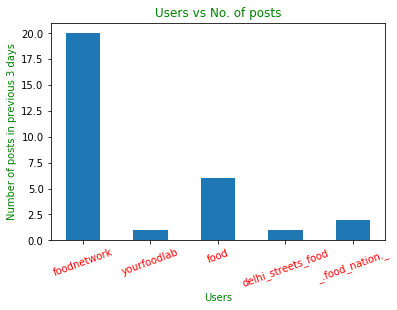

In [6]:
import matplotlib.pyplot as plt

x=[]
for i in sorted_dict[:5]:
    x.append(i[-1])

plt.title('Users vs No. of posts', color='green')
plt.xlabel("Users", color='green')
plt.ylabel("Number of posts in previous 3 days", color='green')
plt.bar(x,post_count, width=0.51)
plt.xticks(rotation=20, color='red')
plt.show()


# 2. Your friend also needs a list of hashtags that he should use in his posts.
        1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each 
        handle.
        2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
   

In [7]:
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs


# initialize a dictionary to store the user profiles as key and all scrapped conted as their values
d1={}

for i in sorted_dict[:5]:
    li=[]
    driver.get(i[-2][1])
    
    #clicking on the first post
    post= driver.find_element_by_class_name('_9AhH0')
    post.click()
    
    #waiting a little so that the post can be open within a popup:
    time.sleep(2)
    
    caption=driver.find_element_by_xpath('//div[contains(@class,"C4VMK")]/span')
    
    #appending scrapped content in the list "li" 
    li.append(caption.text.replace('\n\n','').replace('\n',''))
    
    #repeating the process for next 9 posts
    for k in range(9):
        next_img= driver.find_element_by_xpath("//a[contains(@class,'_65Bje  ')]")
        next_img.click()
        
        wait=WebDriverWait(driver,10)
        caption=wait.until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'C4VMK')]/span")))
        li.append(caption.text.replace('\n\n','').replace('\n',''))
        
    d1[i[-1]]=li
print(d1)

{'foodnetwork': ["This Quick-Marinated Cherry Tomato Salad only takes 10 minutes to make! (As if you need another excuse to make it 👏) \u2060\u2060Click the link in our bio to get @thepioneerwoman's recipe.", '5 Major Chicken MistakesRule #1: Never, ever rinse your chicken before cooking 😬😳', "What's your #DDD binge record?Don't miss a flavor-packed evening of #DDD with @GuyFieri beginning at 6|5c!", "@BobbyFlay's crunchy avocado salad is the perfect side for a summer BBQ! 🥑\u2060\u2060Don't miss the next round of the #Chopped: Beat Bobby Flay tournament > Sunday 9|8c.\u2060\u2060Click the link in our bio to get the recipe!", 'What could go wrong in the kitchen? "I\'m scared you\'re going to be the old nine-fingered Schumer." 🤣🤣 Chef Chris and @AmySchumer give us the scoop on #AmySchumerLearnsToCook. Watch NEW episodes on Monday at 10|9c!', 'Recipe of the Day: Smoky Caprese Bread Bowl 🍅 Click the link in our bio to get the recipe!', 'Double Chocolate Red Wine Bundt Cake (with @giadadel

In [8]:

#initialize a dictionary d2 which will have all words from scrapped content as keys and
#their frequency as the values

d2={}
for val in d1.values():
    for i in val:
        for k in i.split(' '):
            d2[k]=d2.get(k,0)+1


 3. Create a csv file with two columns : the word and its frequency

In [9]:
import pandas as pd

#saving the dictionary content to a csv file 
(pd.DataFrame.from_dict(data=d2, orient='index')
   .to_csv('dict_file.csv', header=False))

4. Now, find the hashtags that were most popular among these bloggers.
5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the                  scraped posts.

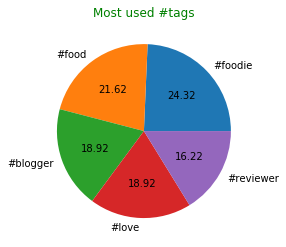

In [10]:

# reading the data from the csv file
path='C:/Users/RAHUL/Documents/Web_Scrapping/Insta-Bot-2/dict_file.csv'
data=pd.read_csv(path,encoding='utf-8', header=None)

#adding columns to the csv file
data.columns = ["Words", "Count"]
df=data.copy()

# sort the table data in descending order such that mostly used tags can also be arranged in descending the data
df=df.sort_values(by='Count', ascending=False)

words,count=[],[]
z=0

# iterate over the data to find the top 5 mostly used tags
for i in df.index:
    if z==5:
        break
    w,c=df['Words'][i],df['Count'][i]
    if '#' in str(w):
        words.append(w)
        count.append(c)
        z+=1
        
        
plt.pie(count, autopct='%.2f', labels=words)
plt.title('Most used #tags', color='green')
plt.show()

# 3. You need to also calculate average followers : likes ratio for the obtained handles.
    Followers : Likes ratio is calculated as follows:
       1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.
       2. Calculate the average likes for a handle.
       3. Divide the average likes obtained from the number of followers of the handle to get the average followers:like
       ratio of each handle.


In [11]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt


#function to get average likes on each post
def get_average_like(followers_count):
    
    # if it's an image post then try block code will excute as it will have likes
    try:
        likes=driver.find_element_by_css_selector('div.Nm9Fw button span')
        total_likes= int(likes.get_attribute('innerHTML').replace(',',''))
        
        return round(total_likes/followers_count,5)
        
    # else this block code will excute for the video post as it have views to click on finding the likes
    except:
        
        wait=WebDriverWait(driver,10)
        view_button=wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"_9Ytll")]/span')))
        view_button.click()
        
        time.sleep(1)
        likes=driver.find_element_by_css_selector("div.vJRqr span")
        total_likes= int(likes.get_attribute('innerHTML').replace(',',''))
        
        return round(total_likes/followers_count,5)

# initializing a dictionary to store average of the average likes on the top 10 posts of the tops 5 handles
# which has most subscribers and we found them from the the search results

avg_like={}
for i in sorted_dict[:5]:
    average_likes=[]
    driver.get(i[-2][1])
    time.sleep(3)
    
    # saving the followers of each profile in followers_count
    followers_count=i[-2][0]

    
    # performig click on the first post
    wait=WebDriverWait(driver,12)
    post=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_9AhH0')))
    post.click()
    
    var=False
    for m in range(10):
        if var==False:
            var=True
            z=get_average_like(followers_count)
            average_likes.append(z)
            
            
        else:
            next_img= driver.find_element_by_xpath("//a[contains(@class,'_65Bje  ')]")
            driver.execute_script("arguments[0].click();", next_img)

            z=get_average_like(followers_count)
            average_likes.append(z)
            
    avg_like[i[-1]]=average_likes
            
print(avg_like)          
            
   

{'foodnetwork': [0.00026, 0.00135, 0.00035, 0.0005, 0.00038, 0.00128, 0.001, 0.00277, 0.00078, 0.00271], 'yourfoodlab': [0.02194, 0.0128, 0.03458, 0.02162, 0.01502, 0.02708, 0.01731, 0.02544, 0.02671, 0.01963], 'food': [0.00756, 0.0456, 0.01479, 0.02247, 0.02348, 0.04193, 0.02061, 0.02923, 0.03301, 0.02423], 'delhi_streets_food': [0.01762, 0.06677, 0.05231, 0.24511, 0.20021, 0.15465, 0.12213, 0.13467, 0.08106, 0.09827], '_.food_nation._': [0.09331, 0.15033, 0.09661, 0.15221, 0.14609, 0.06786, 0.1164, 0.10415, 0.10179, 0.11828]}


3. Create a bar graph to depict the above obtained information.

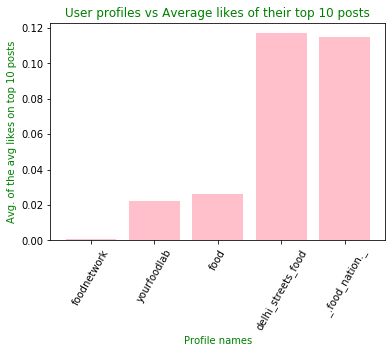

In [12]:

profile_names,avg=[],[]
for key,values in avg_like.items():
    profile_names.append(key)
    sum=0
    for val in values:
        sum+=val
    avg.append(round(sum/10,3))

plt.bar(profile_names,avg, color='pink')
plt.xlabel('Profile names', color='green')
plt.ylabel('Avg. of the avg likes on top 10 posts', color='green')
plt.title('User profiles vs Average likes of their top 10 posts', color='green')
plt.xticks(rotation=60)
plt.show()
